# 10주차: 09장 데이터분석 프로젝트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# PC에서 한글 설정
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [3]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [5]:
!pip install pyreadstat

In [6]:
raw_welfare = pd.read_spss('data/Koweps_hpwc14_2019_beta2.sav') # Koweps_Codebook_2019.xlsx로 볼 수 있움
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [7]:
raw_welfare.info() # 칼럼 너무 많아서 보여지지 않움

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [8]:
welfare = raw_welfare.copy()
welfare.shape

(14418, 830)

In [9]:
welfare = welfare.rename(columns = {'h14_g3': 'sex', 
                                   'h14_g4': 'birth',
                                   'h14_g10': 'marriage_type',
                                   'h14_g11': 'religion',
                                   'p1402_8aq1': 'income',
                                   'h14_eco9': 'code_job',
                                   'h14_reg7': 'code_region'})
welfare['sex']

0        2.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
14413    2.0
14414    2.0
14415    1.0
14416    2.0
14417    1.0
Name: sex, Length: 14418, dtype: float64

In [10]:
welfare.birth.dtype

dtype('float64')

In [11]:
welfare.birth.value_counts()

birth
1942.0    317
1939.0    258
1940.0    255
1947.0    246
1943.0    233
         ... 
1924.0      4
1919.0      2
1920.0      2
1917.0      1
1907.0      1
Name: count, Length: 102, dtype: int64

In [12]:
welfare.birth.isna().sum()

0

In [13]:
welfare.sex.isna().sum()

0

In [14]:
welfare.sex.value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [15]:
plt.rcParams.update({'figure.figsize': [5, 3]})

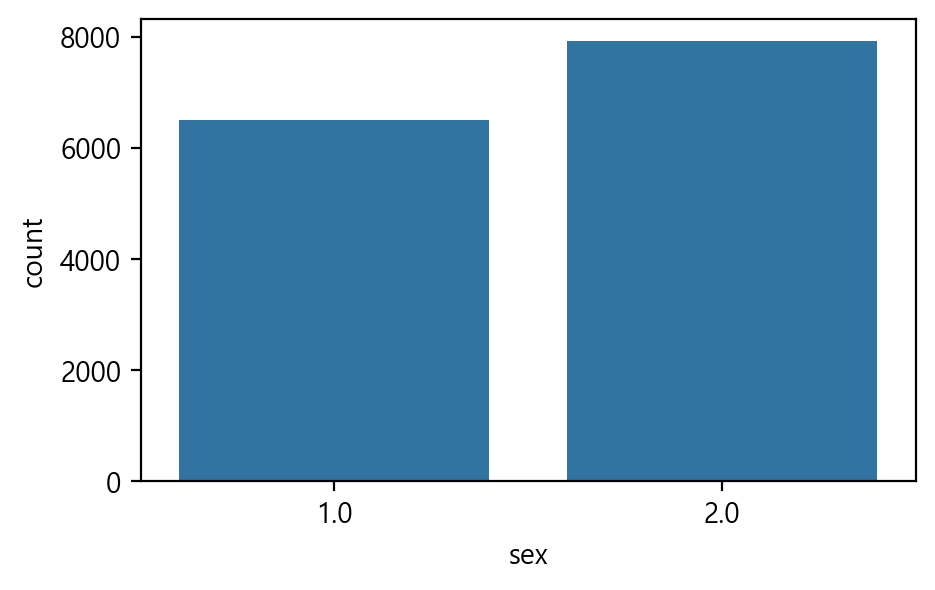

In [16]:
sns.countplot(welfare, x = 'sex');

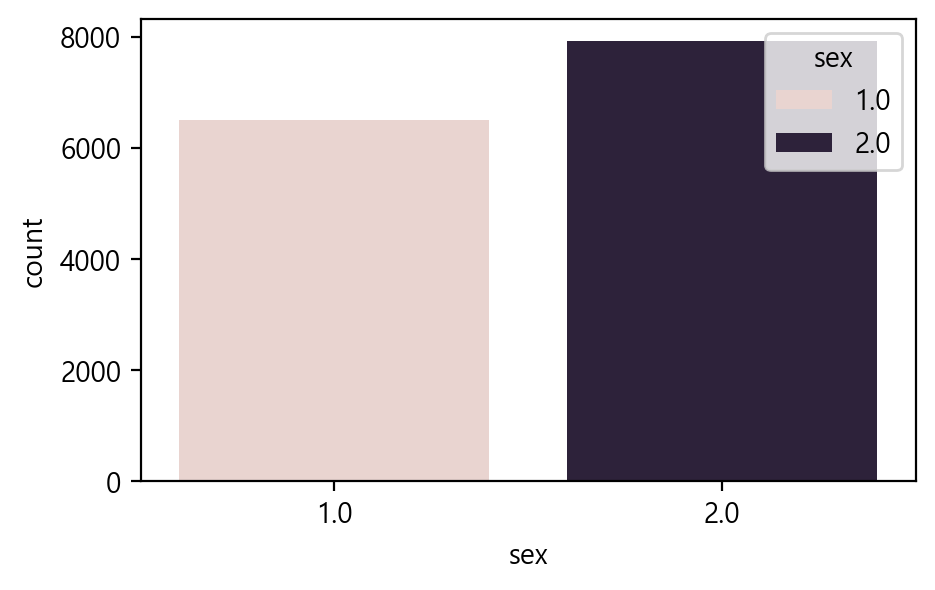

In [17]:
sns.countplot(welfare, x = 'sex', hue = 'sex');

In [18]:
welfare.income.dtypes

dtype('float64')

In [19]:
welfare.income.describe() # 단위 100만 원

count    4534.00
mean      268.46
std       198.02
min         0.00
25%       150.00
50%       220.00
75%       345.75
max      1892.00
Name: income, dtype: float64

In [20]:
welfare.income.isna().sum()

9884

In [21]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

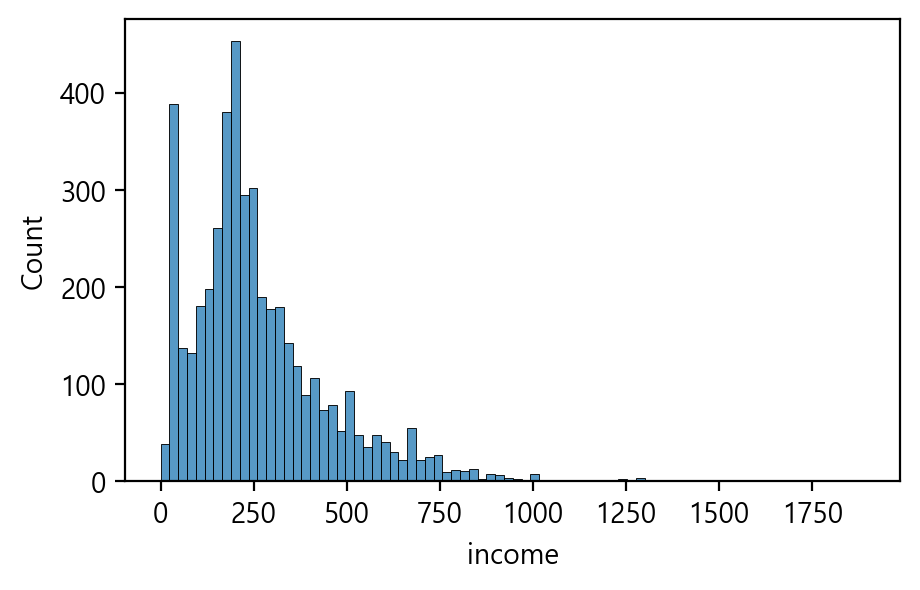

In [22]:
sns.histplot(welfare, x = 'income');

In [23]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean')) # 성별 소득
sex_income

,sex,mean_income
0,female,186.29
1,male,349.04


In [24]:
sex_income = welfare.groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean')) # dropna 안 해도 값은 동일
sex_income

,sex,mean_income
0,female,186.29
1,male,349.04


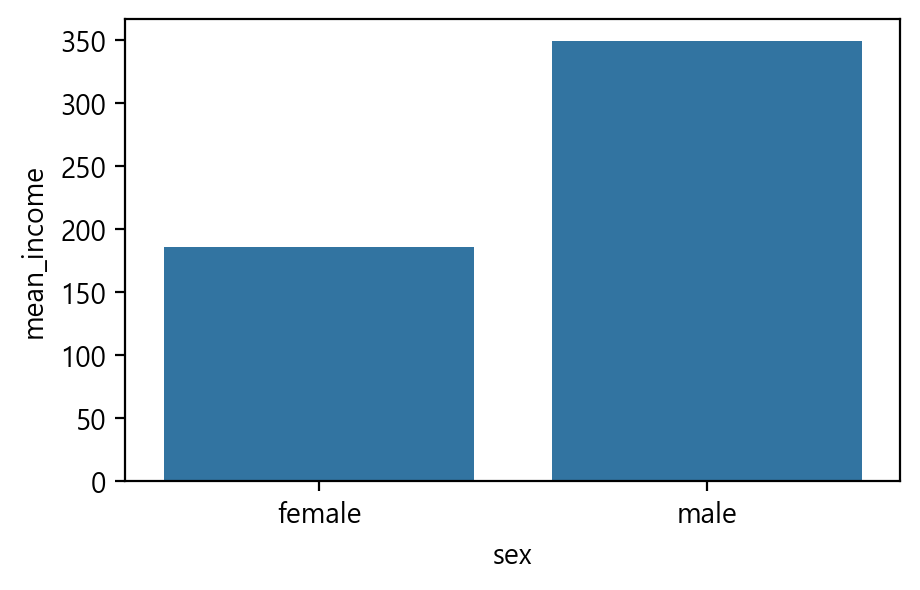

In [25]:
sns.barplot(sex_income, x = 'sex', y = 'mean_income');

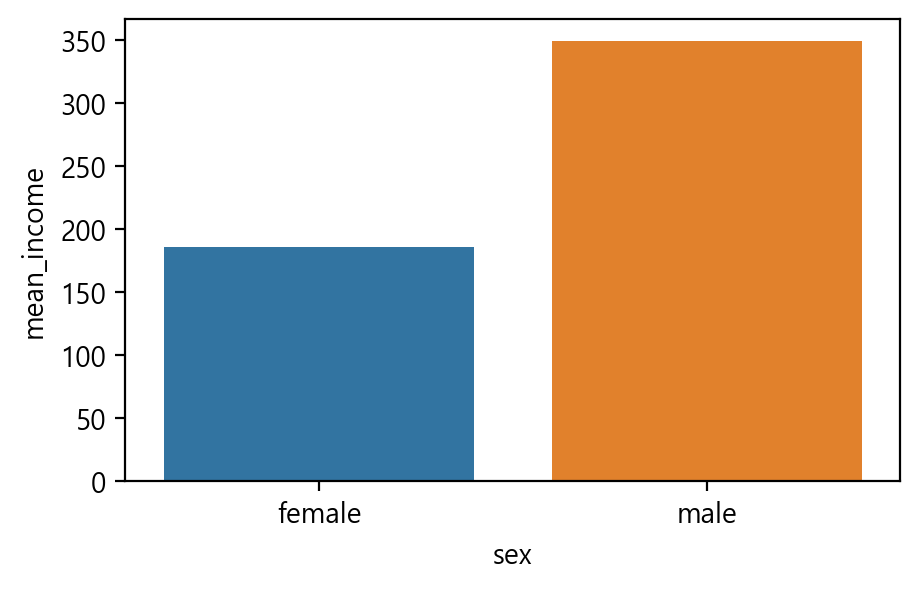

In [26]:
sns.barplot(sex_income, x = 'sex', y = 'mean_income', hue = 'sex');

## 나이와 월급의 관계

In [27]:
welfare.birth.describe()

count    14418.00
mean      1969.28
std         24.40
min       1907.00
25%       1948.00
50%       1968.00
75%       1990.00
max       2018.00
Name: birth, dtype: float64

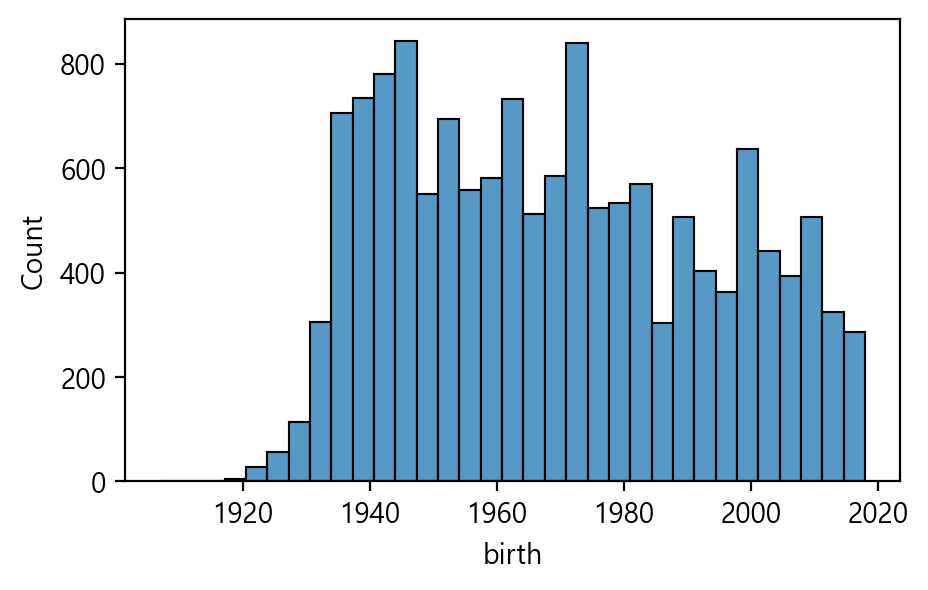

In [28]:
sns.histplot(welfare, x = 'birth');

In [29]:
welfare.birth.isna().sum()

0

In [30]:
welfare[welfare.birth == 9999] # 9999 데이터 있나 확인, birth는 missing value 없움

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5


In [31]:
welfare = welfare.assign(age = 2019 - welfare['birth']) # 복지 대상을 보는 거라 연령 높음
welfare.age.describe()

count    14418.00
mean        49.72
std         24.40
min          1.00
25%         29.00
50%         51.00
75%         71.00
max        112.00
Name: age, dtype: float64

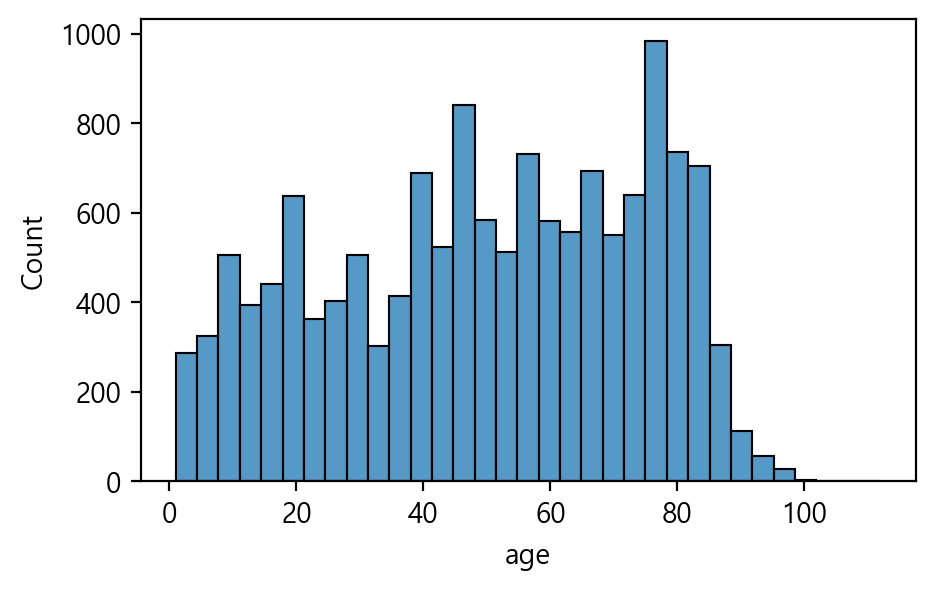

In [32]:
sns.histplot(welfare, x = 'age');

In [33]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean')) # 나이 소득
age_income

,mean_income
age,
18.0,162.00
19.0,121.33
20.0,136.40
21.0,123.67
22.0,179.68
...,...
87.0,27.00
88.0,27.00
89.0,27.00


In [34]:
age_income.head()

,mean_income
age,
18.0,162.00
19.0,121.33
20.0,136.40
21.0,123.67
22.0,179.68


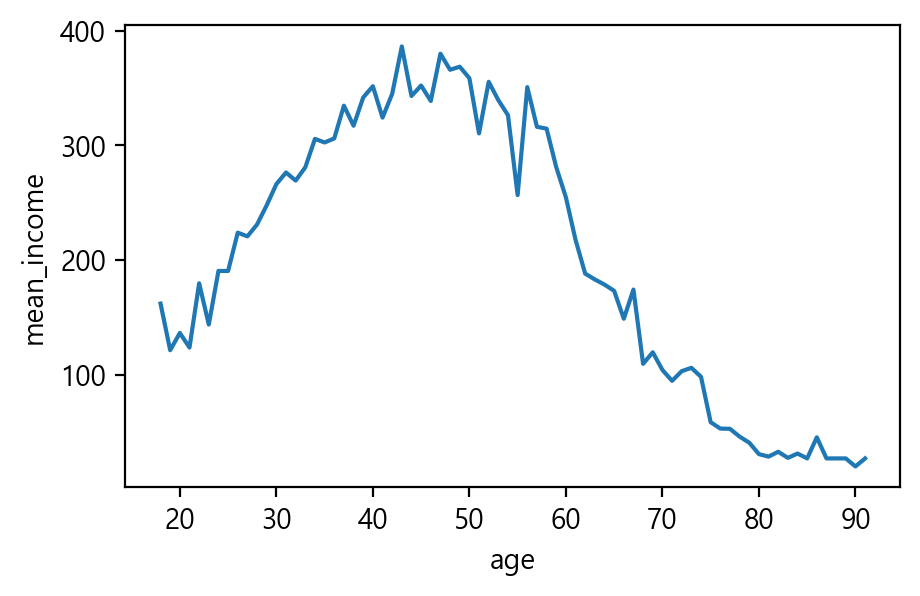

In [35]:
sns.lineplot(age_income, x = 'age', y = 'mean_income');

In [36]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young', 
                                np.where(welfare['age'] <= 59, 'middle', 'old')))

welfare['ageg'].value_counts()

ageg
old       5743
middle    5066
young     3609
Name: count, dtype: int64

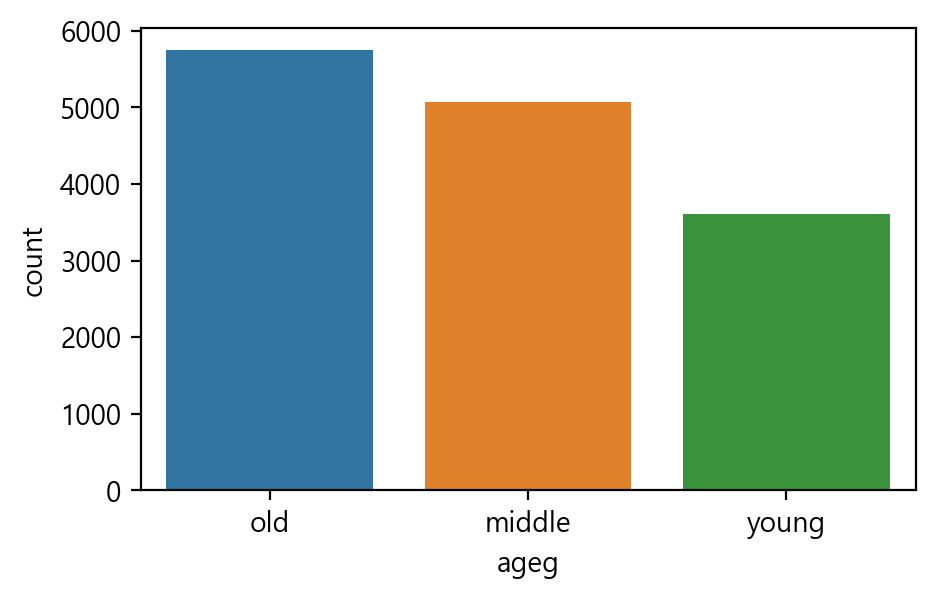

In [37]:
sns.countplot(welfare, x = 'ageg', hue = 'ageg');

## 연령대에 따른 월급 차이 분석

In [38]:
# income 결측치 제거
# ageg별 분리
# income 평균 구하기
ageg_income = welfare.dropna(subset = ['income']) \
                     .groupby('ageg', as_index = False) \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.74
1,old,126.26
2,young,202.60


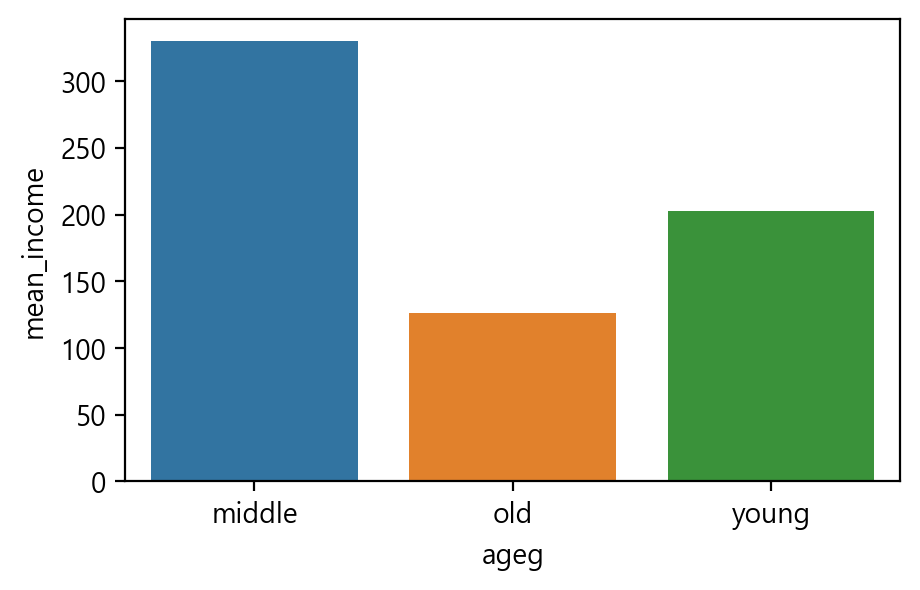

In [39]:
sns.barplot(ageg_income, x = 'ageg', y = 'mean_income', hue = 'ageg');

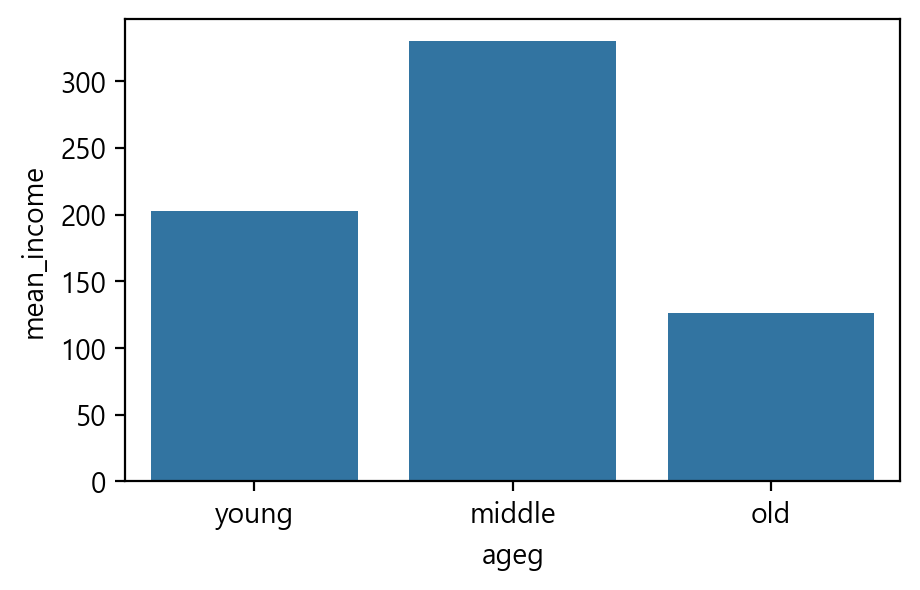

In [40]:
# 막대 정렬하기
sns.barplot(ageg_income, x = 'ageg', y = 'mean_income', order = ['young', 'middle', 'old']);

## 10주차 종료

# 11주차 09-5, 5/26(월) 수업 시작

## 연령대 및 성별 월급 차이

In [41]:
# ageg 및 sex별 분리
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby(['ageg', 'sex'], as_index = False) \
                    .agg(mean_income = ('income', 'mean'))

sex_income

,ageg,sex,mean_income
0,middle,female,229.03
1,middle,male,410.60
2,old,female,84.32
3,old,male,183.91
4,young,female,193.76
5,young,male,215.95


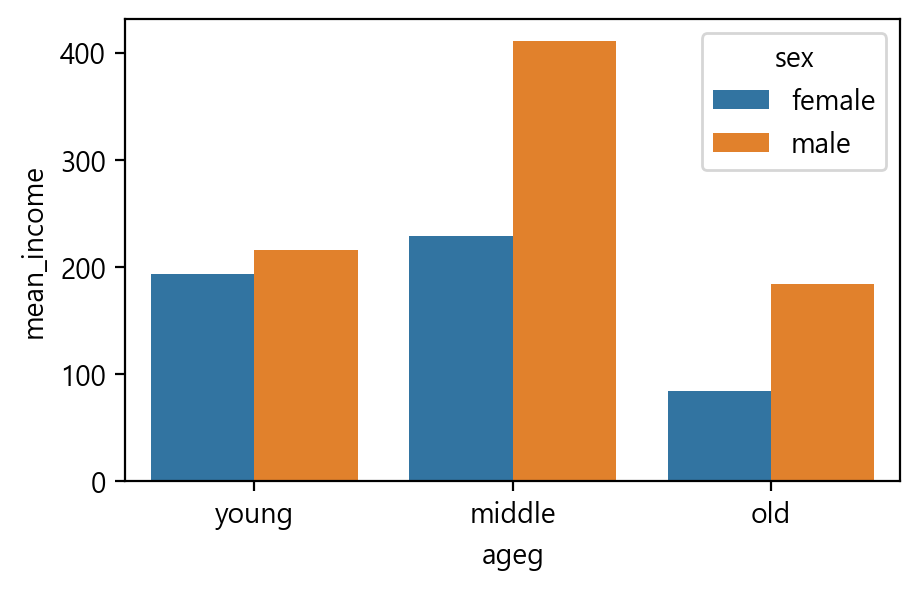

In [42]:
sns.barplot(sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old']);

In [43]:
# age 및 sex별 분리
sex_age = welfare.dropna(subset = ['income']) \
                    .groupby(['age', 'sex'], as_index = False) \
                    .agg(mean_income = ('income', 'mean'))

sex_age.head()

,age,sex,mean_income
0,18.0,male,162.00
1,19.0,female,87.67
2,19.0,male,155.00
3,20.0,female,124.00
4,20.0,male,186.00


In [44]:
sex_age.tail()

,age,sex,mean_income
140,88.0,male,27.0
141,89.0,female,27.0
142,90.0,female,27.0
143,90.0,male,13.0
144,91.0,female,27.0


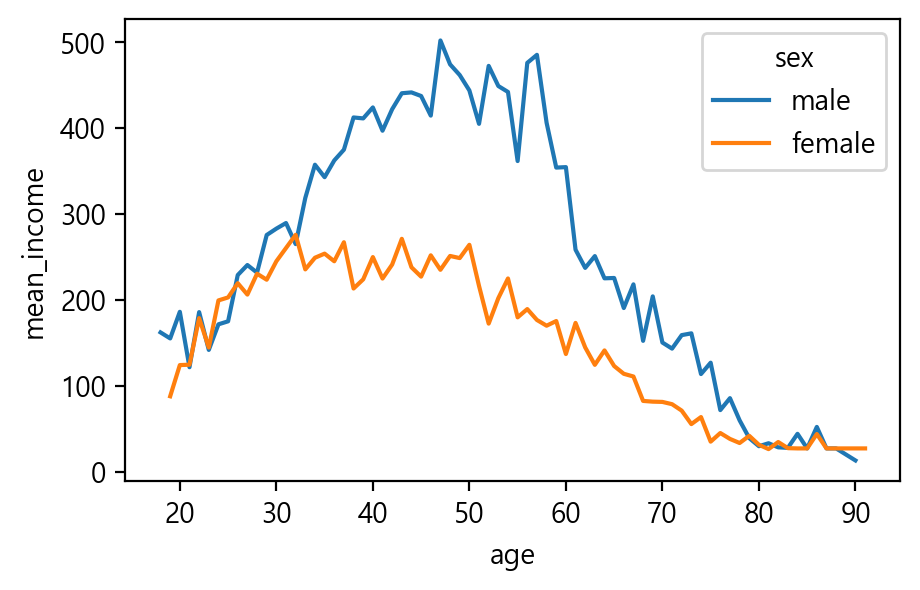

In [45]:
sns.lineplot(sex_age, x = 'age', y = 'mean_income', hue = 'sex');

## 직업별 월급 차이

In [46]:
welfare['code_job'].dtypes # 변수 타입 출력

dtype('float64')

In [47]:
welfare['code_job'].value_counts() # 빈도 구하기

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [48]:
list_job = pd.read_excel('C:/2025-BDA-A-ch09(10-11week)/data/Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [49]:
list_job.shape  # 행, 열 개수 출력

(156, 2)

In [50]:
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how = 'left')
welfare[['job']].head()

,job
0,NaN
1,NaN
2,전기공
3,금속기계 부품 조립원
4,NaN


In [51]:
# code_job 결측치 제거하고 code_job, job 출력
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [52]:
# job별 분리
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby(['job'], as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.46
1,간호사,265.22
2,감정∙기술영업및중개관련종사자,391.00
3,건물 관리원 및 검표원,168.38
4,건설 및 광업 단순 종사자,261.98


In [54]:
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.00
60,법률 전문가,776.33
140,행정 및 경영 지원 관리자,771.83
63,보험 및 금융 관리자,734.75
110,재활용 처리 및 소각로 조작원,688.00
131,컴퓨터 하드웨어 및 통신공학 전문가,679.44
24,기계∙로봇공학 기술자 및 시험원,669.17
6,건설∙전기 및 생산 관련 관리자,603.08
120,제관원 및 판금원,597.00
100,의회 의원∙고위 공무원 및 공공단체 임원,580.50


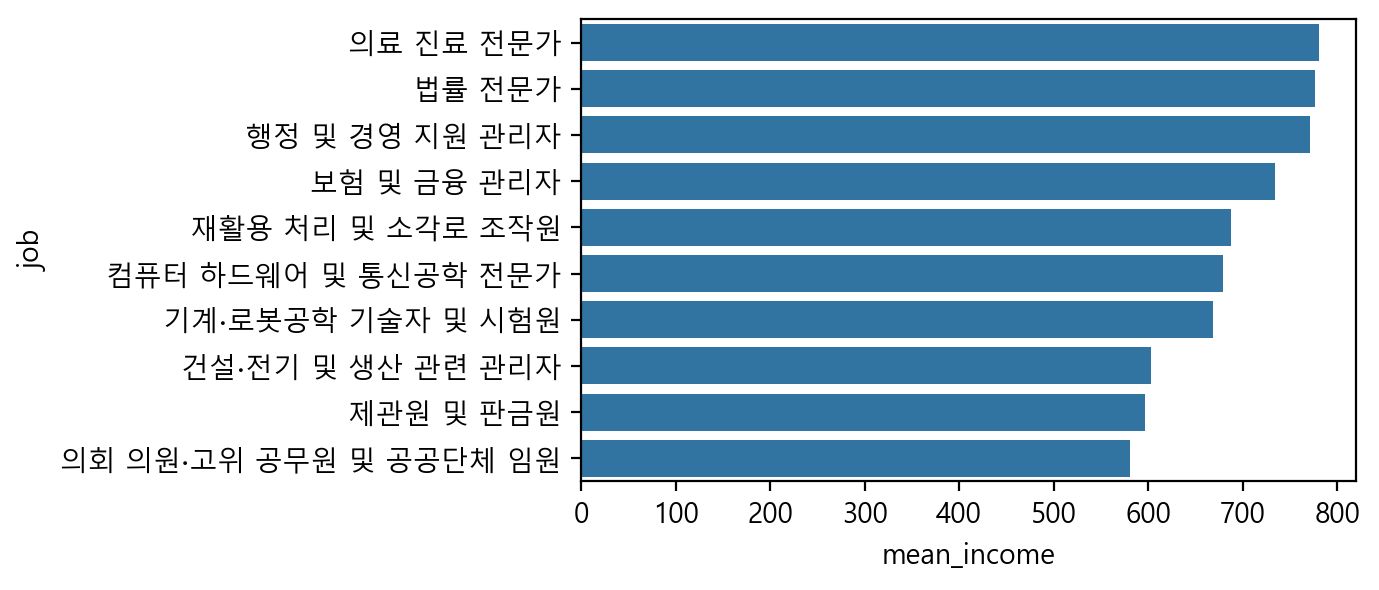

In [55]:
sns.barplot(top10, x = 'mean_income', y = 'job');

In [56]:
btm10 = job_income.sort_values('mean_income').head(10)
btm10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.96
34,기타 서비스 관련 단순 종사자,77.79
128,청소원 및 환경미화원,88.46
0,가사 및 육아 도우미,92.46
43,돌봄 및 보건 서비스 종사자,117.16
97,음식 관련 단순 종사자,118.19
39,농림∙어업 관련 단순 종사자,122.62
139,학예사∙사서 및 기록물 관리사,140.00
126,채굴 및 토목 관련 기능 종사자,140.00
135,판매 관련 단순 종사자,140.91


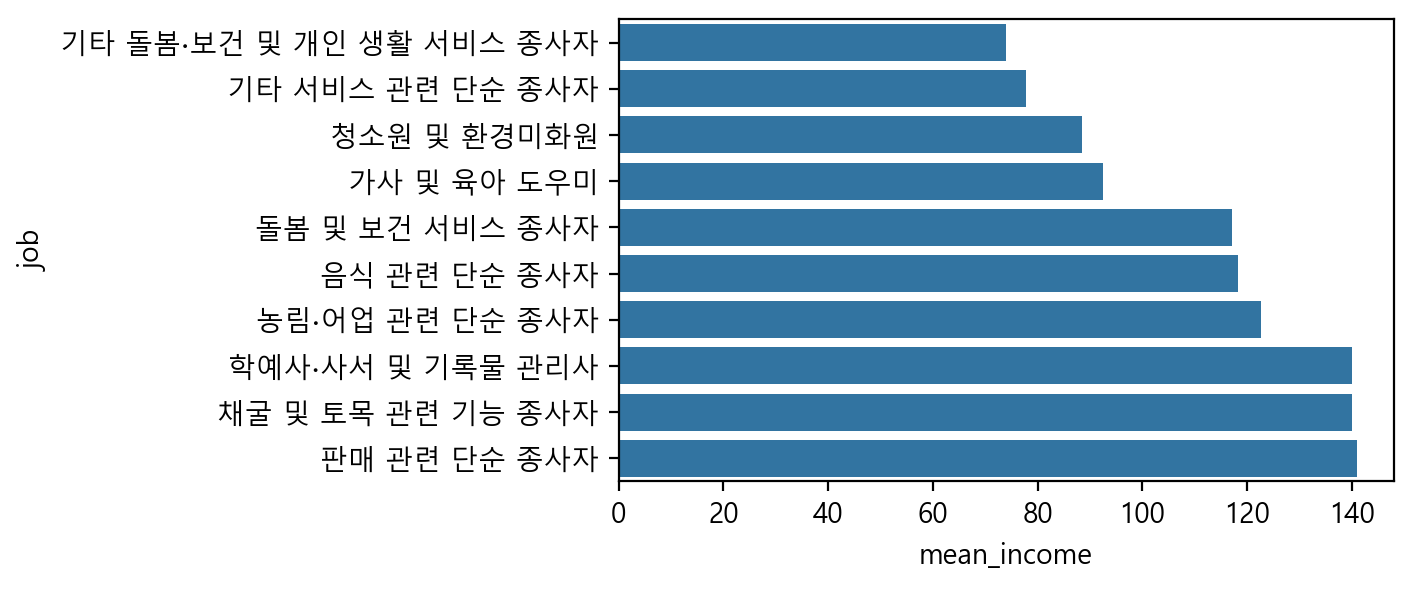

In [57]:
sns.barplot(btm10, x = 'mean_income', y = 'job');

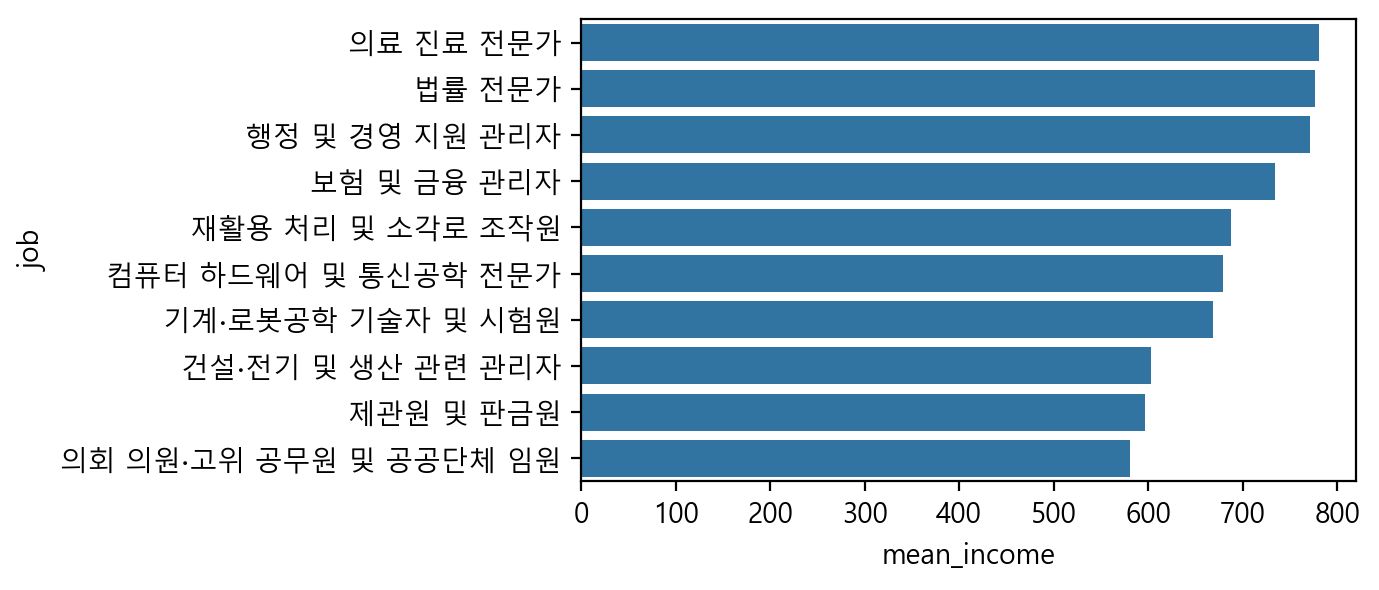

In [58]:
sns.barplot(top10, x = 'mean_income', y = 'job');

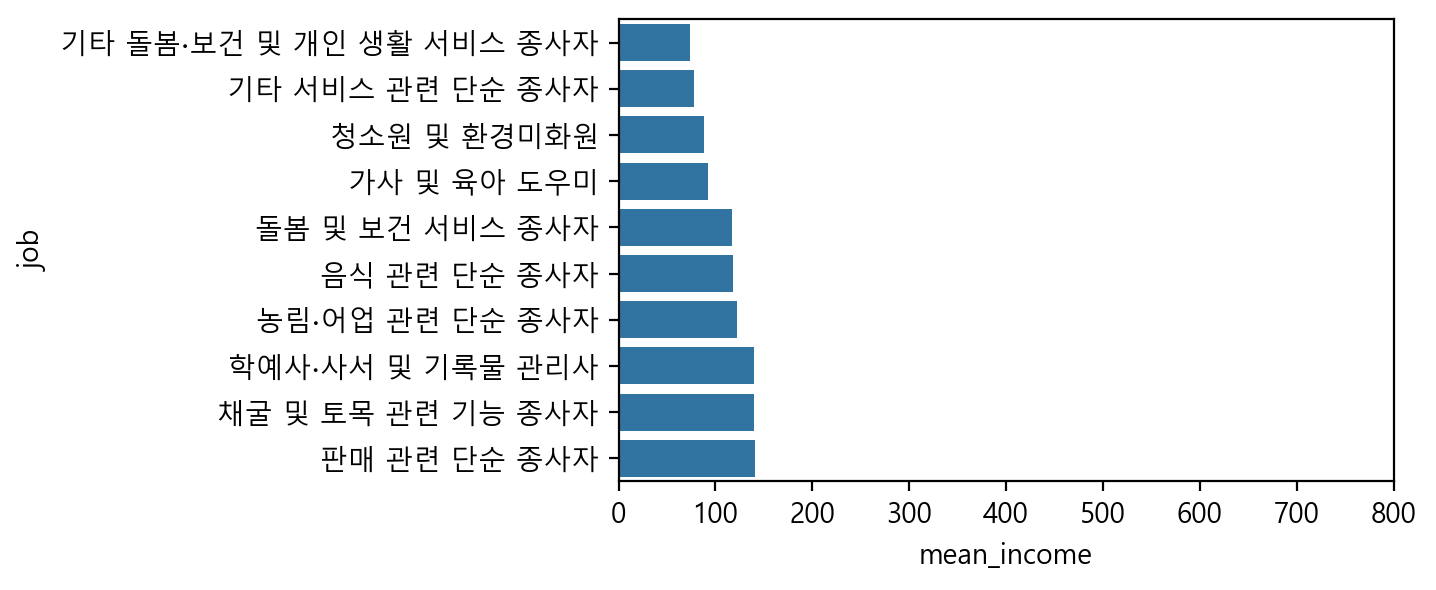

In [59]:
sns.barplot(btm10, x = 'mean_income', y = 'job').set(xlim = [0, 800]);

## 성별 직업 빈도

In [62]:
# 남성 직업 빈도
# job별 분리, job 빈도 구하기

job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index = False) \
                  .agg( n = ('job', 'count') ) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [63]:
# 여성 직업 빈도
# job별 분리, job 빈도 구하기

job_female = welfare.dropna(subset = ['job']) \
                  .query('sex == "female"') \
                  .groupby('job', as_index = False) \
                  .agg( n = ('job', 'count') ) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


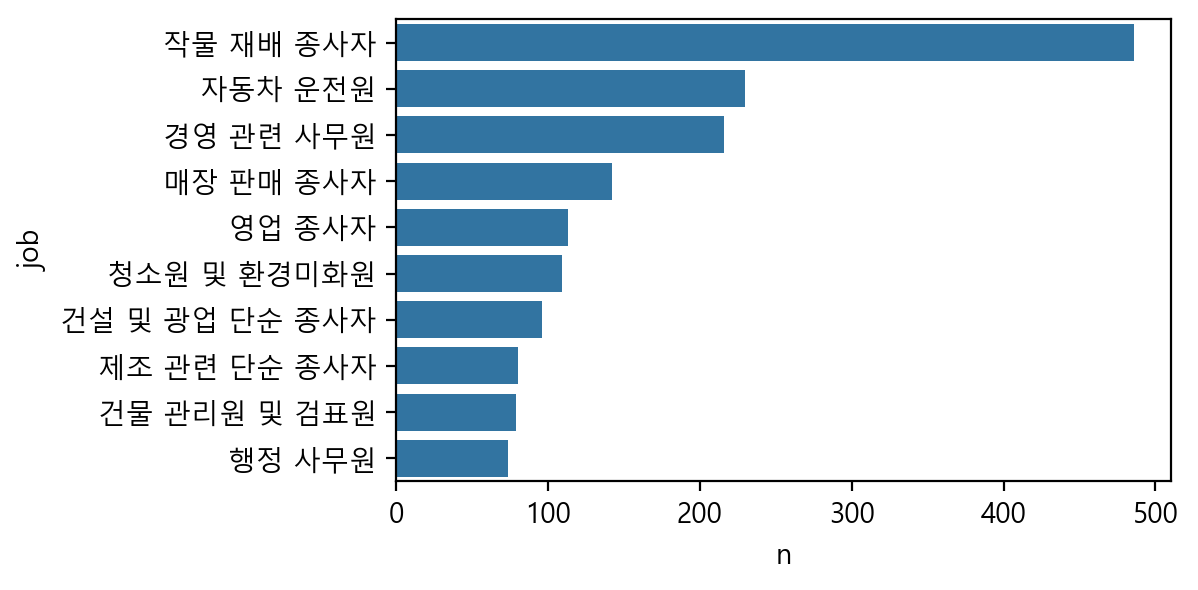

In [64]:
sns.barplot(job_male, x = 'n', y = 'job');

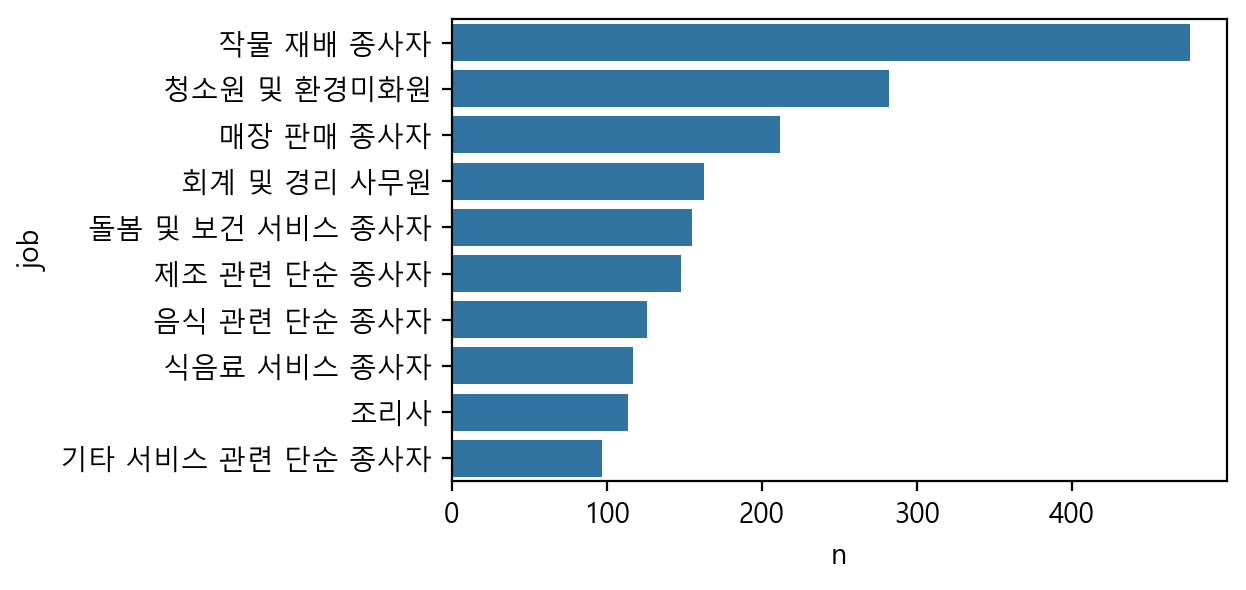

In [65]:
sns.barplot(job_female, x = 'n', y = 'job');

## 종교 유무에 따른 이혼율

In [67]:
welfare.religion.dtypes

dtype('float64')

In [68]:
welfare.religion.value_counts()

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [69]:
welfare.religion.isna().sum()

0

In [71]:
# 종교 유무 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

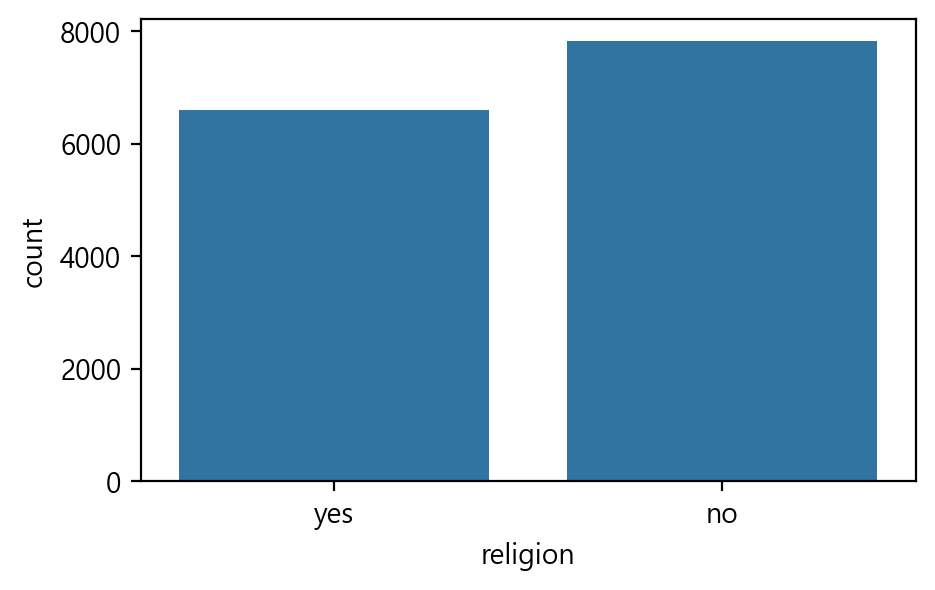

In [72]:
sns.countplot(welfare, x = 'religion');